Nombre de noeuds : 3
Nombre de elements : 3


Combien de forces a appliquer ? 1
noeud concerne ?  3
0 = Fx, 1 = Fy 0
Norme de la force :  1000


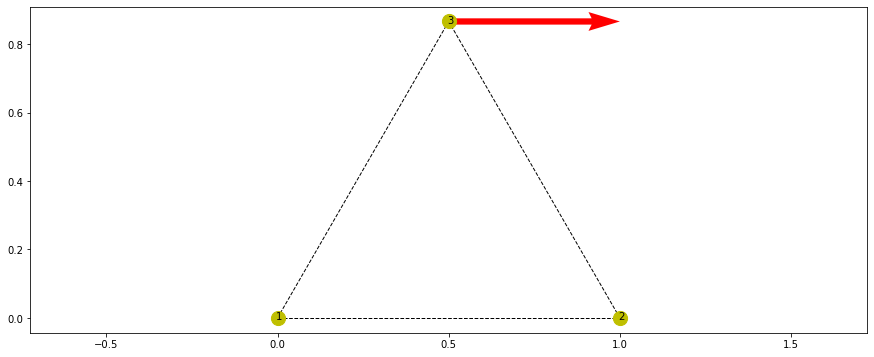

In [70]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as n
from numpy.linalg import inv

### Etape 1 : on defini notre geometrie
cas = 3
%run src\Cas_Test.ipynb
%run src\Fonctions.ipynb

NoN = len(NL) # Nombre de noeuds
NoE = len(EL) # Nombre d'elements
print("Nombre de noeuds :", NoN)
print("Nombre de elements :", NoE)
    
geom(NL)
F = apply_forces_poutre(NoN)
plot_forces( NL, F)

In [71]:
### Etapte 2 : On calcule la matrice de raideur dans le repere local dans les coordonnees locales

E = 1e6 # Module D'Young [en Pa]
S = 1e-1 # Section [en m^2]
L = 100 # Longueur d'un element [en m]
q = 20 # Charge repartie (en N/m)
k = E*S/L
print("Raideur du modele : ", k, "\n")

%run src\Fonctions.ipynb

K_elem = k*np.array([[1, 0 , -1, 0],
                         [0, 0 , 0, 0],
                        [-1, 0, 1, 0],
                        [0, 0 , 0 , 0]])

def K_elem(L_e) :
    K_elem = E*S/L_e*np.array([[1, 0 , -1, 0],
                         [0, 0 , 0, 0],
                        [-1, 0, 1, 0],
                        [0, 0 , 0 , 0]])
    return K_elem

### Etape 3 : On passe la matrice de raideur dans les coordonnees globale (on fait des rotations)

matrices_de_passage = changement_coord(NL,EL)
#for x in matrices_de_passage : 
#    print(x)

K_glob = assemblage_2D(matrices_de_passage,NL,EL)

BC1 = np.array([[0. , 0., 0., 0.],
              [0. , 0., 0., 0.],
              [1. , 0., 0., 0.],
              [0., 1., 0., 0.],
              [0., 0., 1., 0.],
              [0., 0.,0., 1.]])
BC2 = np.array([[0. ,0. , 0., 0., 0.],
               [0. ,0. , 0., 0., 0.],
               [1. ,0. , 0., 0., 0.],
               [0. ,0. , 0., 0., 0.],
               [0. ,1. , 0., 0., 0.],
               [0. ,0. , 1., 0., 0.],
               [0. ,0. , 0., 1., 0.],
               [0. ,0. , 0., 0., 1.]])
BC3 = np.array([[ 0., 0., 0.],
              [ 0., 0., 0.],
              [1. , 0., 0.],
              [0., 0., 0.],
              [0., 1., 0.],
              [0., 0., 1.]])
BC = BC3
#F = np.array([0, 0, 0, 0, 100, 0])
#F = np.array([0, 0, 0, 0, 0, 0, 100, 0])
BC = bc(NoN)
#F = apply_forces_poutre(NoN)
F = F.flatten()
F = np.vstack(F)

#U = solve(K_glob,F,BC)
K_glob_r = np.transpose(BC).dot(K_glob).dot(BC)
F_r = np.transpose(BC).dot(F)

### Etape 7 : Resolution
U_r = inv(K_glob_r).dot(F_r)
U = BC.dot(U_r)

### Etape 8 : Calcul force reaction
React = K_glob.dot(U) - F

### Etape 9 : Calcul des contraintes
# On recalcule les déplacements locaux
u = R(0).dot(U[0:4])
#f = K_elem.dot(u)

affiche = 0
if affiche == 1 : 
    print("K_glob \n :",K_glob_r)
    print("F \n :",F_r)
    print("Deplacement : \n", U_r)
    print("Deplacement : \n", U)
    print("Reaction : \n", React)

sigma = stress_barre(u)/1e6
print("Calcul des contraintes (en MPa) : \n",sigma)

Raideur du modele :  1000.0 

 ### Debut de l'assemblage ###
### Fin de l'assemblage ###
determinant : 3.928503456835636e-19
BC : 
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


Combien de ddl a bloquer ? 3
element concerne ? 1
0 = u, 1 = v 0
element concerne ? 1
0 = u, 1 = v 1
element concerne ? 2
0 = u, 1 = v 1


BC : 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Calcul des contraintes (en MPa) : 
 [[ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.25381306e+12]]


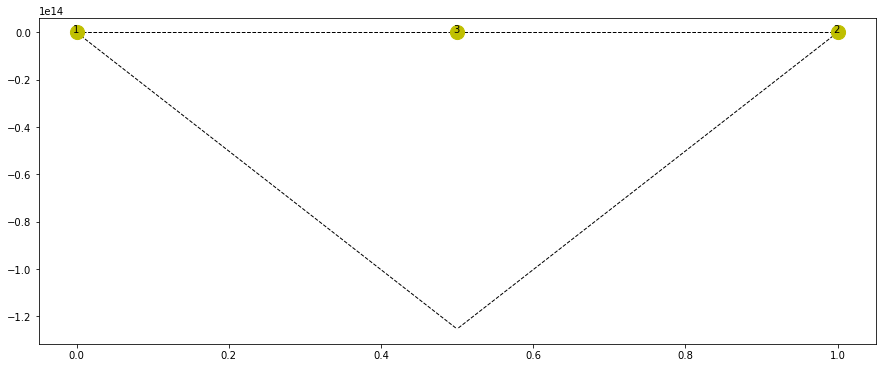

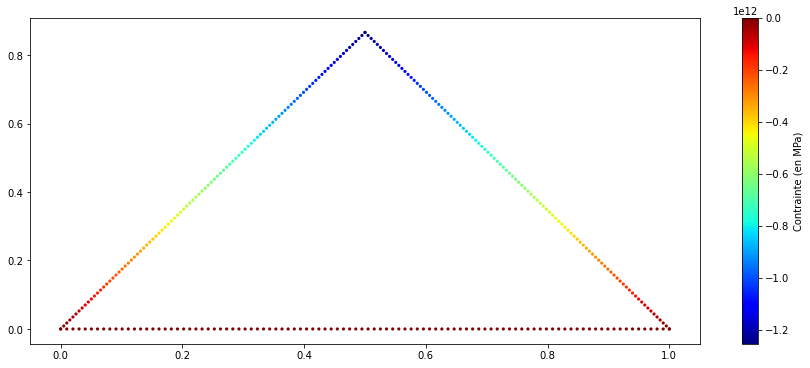

In [73]:
### Etape 10 : Affichage
scale = 100

#plt.scatter(NL[:,0],NL[:,1])
#plt.scatter(NL[:,0]+scale*U[::2].flatten(),NL[:,1]+scale*U[1::2])
    
plot_disp(NL,U)
plot_stress(NL,U)
#norm_x = Normalize(np.abs(color.min()),np.abs(color.max()))